<a href="https://colab.research.google.com/github/HsiuuYing/python-machine-learning/blob/main/%E5%B0%88%E9%A1%8C%E4%BA%8C_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Datasets Source
This dataset was from OSMH/OSMI Mental Health in Tech Survey 2014:
https://osmihelp.org/research

## Dataset Information
This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace. This training dataset contains 1007 records, including 510 persons who sought treatment for a mental health condition and 497 persons without seeking treatment. To study this dataset, it may help to assist companies in making supportive environments for those impacted by mental health disorders. The "treatment" field is a class label used to divide into groups (sought treatment or not).

## Attribute Information:
This dataset contains the following data:

1. Age
2. Gender
3. self_employed: Are you self-employed?
4. family_history: Do you have a family history of mental illness?
5. work_interfere: If you have a mental health condition, do you feel that it interferes with your work?
6. no_employees: How many employees does your company or organization have?
remote_work: Do you work remotely (outside of an office) at least 50% of the time?
7. tech_company: Is your employer primarily a tech company/organization?
8. benefits: Does your employer provide mental health benefits?
9. care_options: Do you know the options for mental health care your employer provides?
10. wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?
11. seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?
12. anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
13. leave: How easy is it for you to take medical leave for a mental health condition?
14. mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative consequences?
15. physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences?
16. coworkers: Would you be willing to discuss a mental health issue with your coworkers?
17. supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?
18. mentalhealthinterview: Would you bring up a mental health issue with a potential employer in an interview?
19. physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?
20. mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?
21. obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
22. treatment: Have you sought treatment for a mental health condition?


### Download the training set

In [ ]:
# Download from Google Drive
!gdown --id 1HZnYBOe8Z04UzK6T0BXeTH5oaU_ABjIz

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1HZnYBOe8Z04UzK6T0BXeTH5oaU_ABjIz
To: /content/project2.zip
100% 19.2k/19.2k [00:00<00:00, 24.3MB/s]


In [ ]:
!unzip project2.zip
# if seeing the message: "replace project1_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:"
# you may enter "A"

Archive:  project2.zip
replace project2_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: project2_test.csv       
  inflating: project2_train.csv      


In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('project2_train.csv')
df.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'work_interfere',
       'no_employees', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'treatment'],
      dtype='object')

In [ ]:
df.head()

# 處理缺失值、轉換很多

,Age,Gender,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,treatment
0,37,Female,NaN,No,Often,6-25,No,Yes,Yes,Not sure,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,Yes
1,44,M,NaN,No,Rarely,More than 1000,No,No,Don't know,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,No
2,32,Male,NaN,No,Rarely,6-25,No,Yes,No,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,No
3,31,Male,NaN,Yes,Often,26-100,No,Yes,No,Yes,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,Yes
4,31,Male,NaN,No,Never,100-500,Yes,Yes,Yes,No,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,No


In [ ]:
df.columns

#年齡 性別 自雇者 家族史 心理憂鬱程度 公司規模 遠距工作 科技業嗎

Index(['Age', 'Gender', 'self_employed', 'family_history', 'work_interfere',
       'no_employees', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'treatment'],
      dtype='object')

In [ ]:
# 看有幾種可能性
for col in df.columns:
  print('Unique values in {} :'.format(col), len(df[col].unique()))

Unique values in Age : 52
Unique values in Gender : 44
Unique values in self_employed : 3
Unique values in family_history : 2
Unique values in work_interfere : 5
Unique values in no_employees : 6
Unique values in remote_work : 2
Unique values in tech_company : 2
Unique values in benefits : 3
Unique values in care_options : 3
Unique values in wellness_program : 3
Unique values in seek_help : 3
Unique values in anonymity : 3
Unique values in leave : 5
Unique values in mental_health_consequence : 3
Unique values in phys_health_consequence : 3
Unique values in coworkers : 3
Unique values in supervisor : 3
Unique values in mental_health_interview : 3
Unique values in phys_health_interview : 3
Unique values in mental_vs_physical : 3
Unique values in obs_consequence : 2
Unique values in treatment : 2


In [ ]:
# 非空值null 1007都有 值可能是NaN
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1007 non-null   int64 
 1   Gender                     1007 non-null   object
 2   self_employed              994 non-null    object
 3   family_history             1007 non-null   object
 4   work_interfere             800 non-null    object
 5   no_employees               1007 non-null   object
 6   remote_work                1007 non-null   object
 7   tech_company               1007 non-null   object
 8   benefits                   1007 non-null   object
 9   care_options               1007 non-null   object
 10  wellness_program           1007 non-null   object
 11  seek_help                  1007 non-null   object
 12  anonymity                  1007 non-null   object
 13  leave                      1007 non-null   object
 14  mental_h

In [ ]:
# 空值
df.isnull().sum().sort_values(ascending=False)

work_interfere               207
self_employed                 13
Age                            0
leave                          0
obs_consequence                0
mental_vs_physical             0
phys_health_interview          0
mental_health_interview        0
supervisor                     0
coworkers                      0
phys_health_consequence        0
mental_health_consequence      0
seek_help                      0
anonymity                      0
Gender                         0
wellness_program               0
care_options                   0
benefits                       0
tech_company                   0
remote_work                    0
no_employees                   0
family_history                 0
treatment                      0
dtype: int64

In [ ]:
# work_interfere的種類
df['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [ ]:
# self_employed的種類
df.self_employed.unique()

array([nan, 'Yes', 'No'], dtype=object)

In [ ]:
# Gender的種類
df.Gender.unique()

# Trans跨性別 Cis性別不認同 

array(['Female', 'M', 'Male', 'female', 'male', 'm', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'woman', 'Make', 'Nah', 'All', 'Enby', 'fluid',
       'Genderqueer', 'Androgyne', 'cis-female/femme', 'Guy (-ish) ^_^',
       'male leaning androgynous', 'Male ', 'Trans woman', 'Man', 'msle',
       'Neuter', 'queer', 'Female (cis)', 'Mail', 'cis male',
       'A little about you', 'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male unsure what that really means'], dtype=object)

In [ ]:
# 老師幫我們分的
other = ['A little about you', 'p', 'Nah', 'Enby', 'Trans-female','something kinda male?','queer/she/they','non-binary','All','fluid', 'Genderqueer','Androgyne', 'Agender','Guy (-ish) ^_^', 'male leaning androgynous','Trans woman','Neuter', 'Female (trans)','queer','ostensibly male unsure what that really means','trans']
male  = ['male', 'Male','M', 'm', 'Male-ish', 'maile','Cis Male','Mal', 'Male (CIS)','Make','Male ', 'Man', 'msle','cis male', 'Cis Man','Malr','Mail']
female = ['Female', 'female','Cis Female', 'F','f','Femake', 'woman','Female ','cis-female/femme','Female (cis)','femail','Woman','female']

In [ ]:
# 最小值 最大值
df.Age.min(), df.Age.max()

#老師建議:18以下都改18 超過最大改最大 也可以改平均值

(-1726, 99999999999)

In [ ]:
# yes0 no1
df.treatment = df.treatment.astype('category')
df.treatment = df.treatment.cat.codes
df.treatment.value_counts()

1    510
0    497
Name: treatment, dtype: int64

### The stage is yours

In [ ]:
# 讀test資料

test = pd.read_csv('project2_test.csv')

In [ ]:
# age處理

df['Age'][df['Age']>=65]=65
df['Age'][df['Age']<=20]=20

test['Age'][test['Age']>=65]=65
test['Age'][test['Age']<=20]=20

df.Age.min(), df.Age.max()

(20, 65)

In [ ]:
# 性別取代
df['Gender'][df['Gender'].isin(['A little about you','p','Nah','Enby','Trans-female','something kinda male?','non-binary','All','fluid','Genderqueer','Androgyne','Agender','Guy (-ish) ^_^','male leaning androgynous','Trans woman','Neuter','Female (trans)','queer','ostensibly male unsure what that really means','trans'])]='other'
df['Gender'][df['Gender'].isin(['male','Male','M','m','Male-ish','maile','Cis Male','Mal','Male (CIS)','Make','Male ','Man','msle','cis male','Cis Man','Malr','Mail'])]='male'
df['Gender'][df['Gender'].isin(['Female','female','Cis Female','F','f','Femake','woman','Female ','cis-female/femme','Female (cis)','femail','Woman','female','queer/she/they'])]='female'

test['Gender'][test['Gender'].isin(['A little about you','p','Nah','Enby','Trans-female','something kinda male?','non-binary','All','fluid','Genderqueer','Androgyne','Agender','Guy (-ish) ^_^','male leaning androgynous','Trans woman','Neuter','Female (trans)','queer','ostensibly male unsure what that really means','trans'])]='other'
test['Gender'][test['Gender'].isin(['male','Male','M','m','Male-ish','maile','Cis Male','Mal','Male (CIS)','Make','Male ','Man','msle','cis male','Cis Man','Malr','Mail'])]='male'
test['Gender'][test['Gender'].isin(['Female','female','Cis Female','F','f','Femake','woman','Female ','cis-female/femme','Female (cis)','femail','Woman','female','queer/she/they'])]='female'

# 性別轉換
df['Gender'][df['Gender']=='other']= 2
df['Gender'][df['Gender']=='male']= 1
df['Gender'][df['Gender']=='female']= 0

test['Gender'][test['Gender']=='other']= 2
test['Gender'][test['Gender']=='male']= 1
test['Gender'][test['Gender']=='female']= 0

test.Gender.unique()

array([1, 0, 2], dtype=object)

In [ ]:
# work_interfere處理

df['work_interfere'][df['work_interfere']=='Often']= 3
df['work_interfere'][df['work_interfere']=='Sometimes']= 2
df['work_interfere'][df['work_interfere']=='Rarely']= 1
df['work_interfere'][df['work_interfere']=='Never']= 0

test['work_interfere'][test['work_interfere']=='Often']= 3
test['work_interfere'][test['work_interfere']=='Sometimes']= 2
test['work_interfere'][test['work_interfere']=='Rarely']= 1
test['work_interfere'][test['work_interfere']=='Never']= 0

df.work_interfere.unique()

NameError: ignored

In [ ]:
# no_employees的種類

df.no_employees.unique()

array(['6-25', 'More than 1000', '26-100', '100-500', '1-5', '500-1000'],
      dtype=object)

In [ ]:
# no_employees 取代
df['no_employees'][df['no_employees'].isin(['More than 1000','500-1000'])]= 'big'
df['no_employees'][df['no_employees'].isin(['1-5','6-25','26-100'])]= 'small'

test['no_employees'][test['no_employees'].isin(['More than 1000','500-1000'])]= 'big'
test['no_employees'][test['no_employees'].isin(['1-5','6-25','26-100'])]= 'small'

#轉換
df['no_employees'][df['no_employees']=='big']= 2
df['no_employees'][df['no_employees']=='100-500']= 1
df['no_employees'][df['no_employees']=='small']= 0
test['no_employees'][test['no_employees']=='big']= 2
test['no_employees'][test['no_employees']=='100-500']= 1
test['no_employees'][test['no_employees']=='small']= 0

df['no_employees']

0       0
1       2
2       0
3       0
4       1
       ..
1002    2
1003    0
1004    0
1005    2
1006    1
Name: no_employees, Length: 1007, dtype: object

In [ ]:
# leave的種類

df.leave.unique()

array(['Somewhat easy', "Don't know", 'Somewhat difficult',
       'Very difficult', 'Very easy'], dtype=object)

In [ ]:
# leave取代
df['leave'][df['leave'].isin(['Somewhat easy','Very easy'])]= 'easy'
df['leave'][df['leave'].isin(['Very difficult','Somewhat difficult'])]= 'hard'

test['leave'][test['leave'].isin(['Somewhat easy','Very easy'])]= 'easy'
test['leave'][test['leave'].isin(['Very difficult','Somewhat difficult'])]= 'hard'

# 轉換
df['leave'][df['leave']=='easy']= 0
df['leave'][df['leave']=='hard']= 1
df['leave'][df['leave']=="Don't know"]= 2
test['leave'][test['leave']=='easy']= 0
test['leave'][test['leave']=='hard']= 1
test['leave'][test['leave']=="Don't know"]= 2

df['leave']

0       0
1       2
2       1
3       1
4       2
       ..
1002    0
1003    0
1004    1
1005    1
1006    2
Name: leave, Length: 1007, dtype: object

In [ ]:
# self_employed種類
df.self_employed.unique()

array([nan, 'Yes', 'No'], dtype=object)

In [ ]:
# self_employed轉換

df.self_employed = df.self_employed.astype('category')
df.self_employed = df.self_employed.cat.codes

test.self_employed = test.self_employed.astype('category')
test.self_employed = test.self_employed.cat.codes

test.self_employed.unique()

array([ 0,  1, -1], dtype=int8)

In [ ]:
df.family_history.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
# family_history轉換

df.family_history = df.family_history.astype('category')
df.family_history = df.family_history.cat.codes

test.family_history = test.family_history.astype('category')
test.family_history = test.family_history.cat.codes

test.family_history.unique()

array([1, 0], dtype=int8)

In [ ]:
df.remote_work.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
# remote_work轉換

df.remote_work = df.remote_work.astype('category')
df.remote_work = df.remote_work.cat.codes

test.remote_work = test.remote_work.astype('category')
test.remote_work = test.remote_work.cat.codes

test.remote_work.unique()

array([1, 0], dtype=int8)

In [ ]:
df.tech_company.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
# tech_company轉換

df.tech_company = df.tech_company.astype('category')
df.tech_company = df.tech_company.cat.codes

test.tech_company = test.tech_company.astype('category')
test.tech_company = test.tech_company.cat.codes

test.tech_company.unique()

array([1, 0], dtype=int8)

In [ ]:
df.benefits.unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [ ]:
# benefits轉換

df.benefits = df.benefits.astype('category')
df.benefits = df.benefits.cat.codes

test.benefits = test.benefits.astype('category')
test.benefits = test.benefits.cat.codes

test.benefits.unique()

array([0, 1, 2], dtype=int8)

In [ ]:
df.care_options.unique()

array(['Not sure', 'No', 'Yes'], dtype=object)

In [ ]:
# care_options轉換

df.care_options = df.care_options.astype('category')
df.care_options = df.care_options.cat.codes

test.care_options = test.care_options.astype('category')
test.care_options = test.care_options.cat.codes

test.care_options.unique()

array([0, 1, 2], dtype=int8)

In [ ]:
df.wellness_program.unique()

array(['No', "Don't know", 'Yes'], dtype=object)

In [ ]:
# wellness_program轉換

df.wellness_program = df.wellness_program.astype('category')
df.wellness_program = df.wellness_program.cat.codes

test.wellness_program = test.wellness_program.astype('category')
test.wellness_program = test.wellness_program.cat.codes

test.wellness_program.unique()

array([1, 0, 2], dtype=int8)

In [ ]:
df.seek_help.unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [ ]:
# seek_help轉換

df.seek_help = df.seek_help.astype('category')
df.seek_help = df.seek_help.cat.codes

test.seek_help = test.seek_help.astype('category')
test.seek_help = test.seek_help.cat.codes

test.seek_help.unique()

array([1, 0, 2], dtype=int8)

In [ ]:
df.anonymity.unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [ ]:
# anonymity轉換

df.anonymity = df.anonymity.astype('category')
df.anonymity = df.anonymity.cat.codes


test.anonymity = test.anonymity.astype('category')
test.anonymity = test.anonymity.cat.codes

test.anonymity.unique()

array([0, 2, 1], dtype=int8)

In [ ]:
df.mental_health_consequence.unique()

array(['No', 'Maybe', 'Yes'], dtype=object)

In [ ]:
# mental_health_consequence轉換

df.mental_health_consequence = df.mental_health_consequence.astype('category')
df.mental_health_consequence = df.mental_health_consequence.cat.codes

test.mental_health_consequence = test.mental_health_consequence.astype('category')
test.mental_health_consequence = test.mental_health_consequence.cat.codes

test.mental_health_consequence.unique()

array([1, 2, 0], dtype=int8)

In [ ]:
df.phys_health_consequence.unique()

array(['No', 'Yes', 'Maybe'], dtype=object)

In [ ]:
# phys_health_consequence轉換

df.phys_health_consequence = df.phys_health_consequence.astype('category')
df.phys_health_consequence = df.phys_health_consequence.cat.codes

test.phys_health_consequence = test.phys_health_consequence.astype('category')
test.phys_health_consequence = test.phys_health_consequence.cat.codes

test.phys_health_consequence.unique()

array([1, 2, 0], dtype=int8)

In [ ]:
test.phys_health_consequence.unique()

array([1, 2, 0], dtype=int8)

In [ ]:
df.coworkers.unique()

array(['Some of them', 'No', 'Yes'], dtype=object)

In [ ]:
# coworkers轉換

df.coworkers = df.coworkers.astype('category')
df.coworkers = df.coworkers.cat.codes
df.coworkers.value_counts()

test.coworkers = test.coworkers.astype('category')
test.coworkers = test.coworkers.cat.codes

test.coworkers.unique()

array([2, 1, 0], dtype=int8)

In [ ]:
df.supervisor.unique()

array(['Yes', 'No', 'Some of them'], dtype=object)

In [ ]:
# supervisor轉換

df.supervisor = df.supervisor.astype('category')
df.supervisor = df.supervisor.cat.codes

test.supervisor = test.supervisor.astype('category')
test.supervisor = test.supervisor.cat.codes

test.coworkers.unique()

array([2, 1, 0], dtype=int8)

In [ ]:
df.mental_health_interview.unique()

array(['No', 'Yes', 'Maybe'], dtype=object)

In [ ]:
# mental_health_interview轉換

df.mental_health_interview = df.mental_health_interview.astype('category')
df.mental_health_interview = df.mental_health_interview.cat.codes

test.mental_health_interview = test.mental_health_interview.astype('category')
test.mental_health_interview = test.mental_health_interview.cat.codes

test.mental_health_interview.unique()

array([0, 1, 2], dtype=int8)

In [ ]:
df.phys_health_interview.unique()

array(['Maybe', 'No', 'Yes'], dtype=object)

In [ ]:
# phys_health_interview轉換

df.phys_health_interview = df.phys_health_interview.astype('category')
df.phys_health_interview = df.phys_health_interview.cat.codes

test.phys_health_interview = test.phys_health_interview.astype('category')
test.phys_health_interview = test.phys_health_interview.cat.codes

test.phys_health_interview.unique()

array([2, 1, 0], dtype=int8)

In [ ]:
df.mental_vs_physical.unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [ ]:
# mental_vs_physical轉換

df.mental_vs_physical = df.mental_vs_physical.astype('category')
df.mental_vs_physical = df.mental_vs_physical.cat.codes

test.mental_vs_physical = test.mental_vs_physical.astype('category')
test.mental_vs_physical = test.mental_vs_physical.cat.codes

test.mental_vs_physical.unique()

array([2, 1, 0], dtype=int8)

In [ ]:
df.obs_consequence.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
# obs_consequence轉換

df.obs_consequence = df.obs_consequence.astype('category')
df.obs_consequence = df.obs_consequence.cat.codes

test.obs_consequence = test.obs_consequence.astype('category')
test.obs_consequence = test.obs_consequence.cat.codes

test.obs_consequence.unique()

array([0, 1], dtype=int8)

In [ ]:
from pandas.core.groupby.groupby import T
# yes0 no1
df.treatment = df.treatment.astype('category')
df.treatment = df.treatment.cat.codes
df.treatment.value_counts()


1    510
0    497
Name: treatment, dtype: int64

In [ ]:
test

,Age,Gender,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,24,1,0,1,1,0,1,1,0,0,...,0,0,1,1,2,2,0,2,2,0
1,35,1,0,0,NaN,0,0,0,0,1,...,0,2,1,1,2,2,1,1,1,0
2,32,0,0,0,2,1,0,1,1,0,...,0,1,2,2,1,0,1,1,1,1
3,29,1,0,0,1,2,0,1,2,0,...,0,0,2,0,1,0,1,1,0,0
4,39,1,0,0,NaN,2,1,1,0,1,...,0,2,1,1,1,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,28,1,0,1,3,0,0,1,1,0,...,0,0,0,0,2,2,1,1,1,0
248,41,1,0,1,3,2,0,1,2,0,...,0,2,0,0,1,1,1,1,0,1
249,33,0,0,0,NaN,0,0,1,1,0,...,0,1,0,1,1,1,1,1,0,0
250,45,1,0,0,0,2,1,1,0,1,...,0,2,2,1,2,1,1,1,1,1


In [ ]:
# 找缺失值
df.isnull()

# 處理缺失值
df.fillna(df.mean(),inplace=True)
test.fillna(df.mean(),inplace=True)

test.isnull().sum()

Age                          0
Gender                       0
self_employed                0
family_history               0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Train and Test set
X = df.drop('treatment', axis=1)
y = df.treatment

# Splitting
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 409570092) # random_state改成你自己的學號，純數字


# 建立邏輯迴歸的實體
logisticModel = LogisticRegression()

# 學習
logisticModel.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# 預測
y_pred = logisticModel.predict(X_val)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0], dtype=int8)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print('Classification Report: \n', classification_report(y_val,y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.69      0.69       101
           1       0.69      0.68      0.69       101

    accuracy                           0.69       202
   macro avg       0.69      0.69      0.69       202
weighted avg       0.69      0.69      0.69       202



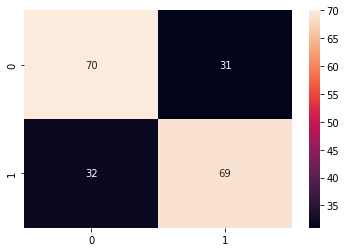

In [ ]:
# 左上右下越高越好
sns.heatmap(confusion_matrix(y_val,y_pred),annot=True,fmt="d")

### Make prediction and submission file

In [ ]:
df.Gender.unique()

array([0, 1, 2])

In [ ]:
test.Gender.unique()

array([1, 0, 2])

In [ ]:
x_test = test

In [ ]:
df_submit = pd.DataFrame([], columns=['Id', 'Treatment'])
df_submit['Id'] = [f'{i:03d}' for i in range(len(test))]
df_submit['Treatment'] = logisticModel.predict(test)

In [ ]:
df_submit.to_csv('submission.csv', index=None)